Epoch	Weights	Bias	Error
1	[-1.062   1.6761  1.5363 -1.2229]	0.0255	7.6436
2	[-1.062   1.6761  1.5363 -1.2229]	-0.1116	1.7934
3	[-1.062   1.6761  1.5363 -1.2229]	-0.1500	1.3547
4	[-1.062   1.6761  1.5363 -1.2229]	-0.1604	1.3206
5	[-1.062   1.6761  1.5363 -1.2229]	-0.1628	1.3111
6	[-1.062   1.6761  1.5363 -1.2229]	-0.1629	1.3019
7	[-1.062   1.6761  1.5363 -1.2229]	-0.1625	1.2927
8	[-1.062   1.6761  1.5363 -1.2229]	-0.1619	1.2837
9	[-1.062   1.6761  1.5363 -1.2229]	-0.1613	1.2750
10	[-1.062   1.6761  1.5363 -1.2229]	-0.1607	1.2667
11	[-1.062   1.6761  1.5363 -1.2229]	-0.1601	1.2587
12	[-1.062   1.6761  1.5363 -1.2229]	-0.1596	1.2509
13	[-1.062   1.6761  1.5363 -1.2229]	-0.1590	1.2435
14	[-1.062   1.6761  1.5363 -1.2229]	-0.1585	1.2362
15	[-1.062   1.6761  1.5363 -1.2229]	-0.1581	1.2292
16	[-1.062   1.6761  1.5363 -1.2229]	-0.1576	1.2223
17	[-1.062   1.6761  1.5363 -1.2229]	-0.1572	1.2156
18	[-1.062   1.6761  1.5363 -1.2229]	-0.1567	1.2091
19	[-1.062   1.6761  1.5363 -1.2229]	-0.1563	1.20

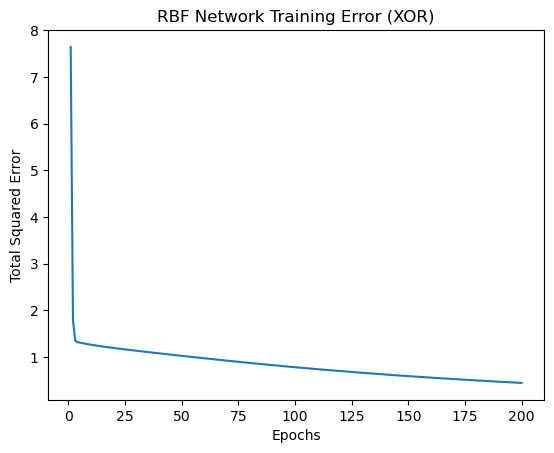

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# RBF centers = training samples
centers = X.copy()

# Initialize weights randomly (one per center) + bias
wts = np.random.rand(len(centers))
bias = np.random.rand()

lr = 0.1
epochs = 200
errors = []

def gaussian(x, c, sigma=1.0):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

print("Epoch\tWeights\tBias\tError")

for epoch in range(epochs):
    total_error = 0
    
    for i in range(len(X)):
        # Compute activations for all centers
        phis = np.array([gaussian(X[i], c) for c in centers])
        
        # Network output
        y_pred = np.dot(wts, phis) + bias
        
        # Error
        error = y[i] - y_pred
        total_error += error**2
        
        # Update weights and bias
        wts += lr * error * phis
        bias += lr * error
    
    errors.append(total_error)
    print(f"{epoch+1}\t{weights.round(4)}\t{bias:.4f}\t{total_error:.4f}")
    
    # Stop early if error is very small
    if total_error < 1e-6:
        break

# Plot error curve
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel("Epochs")
plt.ylabel("Total Squared Error")
plt.title("RBF Network Training Error (XOR)")
plt.show()